Link-https://www.youtube.com/watch?v=Lln1PKgGr_M&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=41

#### What are outlier-

1.Outlier are data points which are different from other observation or odd data points in the data

Based on problem statement we need to decide do we need to remove outlier or not ex in anamoley detection we cannot delete the outlier

#### effect of outlier

in distance based algorithem oulier affect the performance of model

#### how to treat outlier

two ways to treat outlier

1.Trimming/rmoving the outlier
2.capping
3.treat as missing value
4.Discreatisation

#### how to detect outlier

1.Z score treatment
2.IQR based filtering
3.Percentile
4.winseration



# Outlier removal using Z-score

#### Assumption
1.Column data should be normally distributed

if data is outside -3 standard deviation to +3 standard deviation its called outliers range max (m+3standard deviation) min (m-3standard deviation)

Z score (xi)=(xi-mue)/standard deviation

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/Users/pluto7/Desktop/git_data/ML_algorithem/Linear_regression/placement.csv")
df.shape

(200, 2)

In [27]:
df.sample(5)

,cgpa,package
178,8.15,3.63
164,9.06,3.82
163,8.93,3.91
26,8.31,3.42
175,7.04,3.50


In [28]:
#df=df.append('cgpa':12,'package':2)
df = df.append({'cgpa': 12,'package':1}, ignore_index=True)

/var/folders/sl/mghz4g4x4nq06lrj3hn18prw0000gn/T/ipykernel_84968/3788233351.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'cgpa': 12,'package':1}, ignore_index=True)


In [29]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


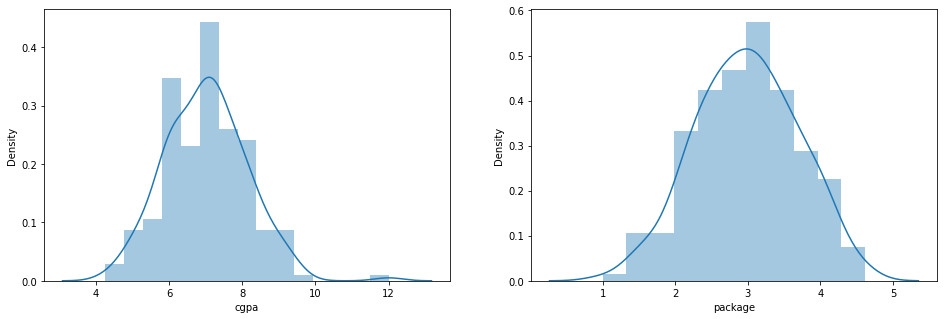

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['package'])

plt.show()

In [31]:
df['package'].skew()
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 7.01542288557214
Std value of cgpa 1.123729480468334
Min value of cgpa 4.26
Max value of cgpa 12.0


In [32]:
df['package'].skew()


-0.07684683369319828

In [33]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 10.386611326977143
Lowest allowed 3.644234444167138


In [34]:
# Finding the outliers
df[(df['cgpa'] > 10.19) | (df['cgpa'] < 3.78)]

,cgpa,package
200,12.0,1.0


In [35]:
new_df = df[(df['cgpa'] < 10.19) & (df['cgpa'] > 3.78)]
new_df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [36]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,package,cgpa_zscore
0,6.89,3.26,-0.111613
1,5.12,1.98,-1.686725
2,7.82,3.25,0.715988
3,7.42,3.67,0.360031
4,6.94,3.57,-0.067118


In [37]:
df[df['cgpa_zscore'] > 3]


,cgpa,package,cgpa_zscore
200,12.0,1.0,4.435745


In [38]:
df[df['cgpa_zscore'] < -3]


,cgpa,package,cgpa_zscore


In [39]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]


,cgpa,package,cgpa_zscore
200,12.0,1.0,4.435745


In [40]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [41]:
new_df


,cgpa,package,cgpa_zscore
0,6.89,3.26,-0.111613
1,5.12,1.98,-1.686725
2,7.82,3.25,0.715988
3,7.42,3.67,0.360031
4,6.94,3.57,-0.067118
...,...,...,...
195,6.93,2.46,-0.076017
196,5.89,2.57,-1.001507
197,7.21,3.24,0.173153
198,7.63,3.96,0.546908


## Capping

In [48]:
df['cgpa'].describe()


count    201.000000
mean       7.007396
std        1.093297
min        4.260000
25%        6.190000
50%        6.970000
75%        7.760000
max       10.386611
Name: cgpa, dtype: float64

In [42]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
lower_limit

3.644234444167138

In [43]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [44]:
df.shape


(201, 3)

In [46]:
df.sample(5)

,cgpa,package,cgpa_zscore
71,7.470000,3.34,0.404525
65,7.600000,3.81,0.520212
108,7.760000,3.54,0.662595
200,10.386611,1.00,4.435745
81,6.100000,2.20,-0.814629


In [47]:
df['cgpa'].describe()


count    201.000000
mean       7.007396
std        1.093297
min        4.260000
25%        6.190000
50%        6.970000
75%        7.760000
max       10.386611
Name: cgpa, dtype: float64